In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wiki_hindi_pageviews_2000_thru_Sep2019.csv")
df.head()

,Unnamed: 0,project,language,article,access,agent,granularity,date,views
0,1,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-01,15
1,2,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-02,10
2,3,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-03,19
3,4,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-04,10
4,5,wikipedia,hi,Kashmir conflict,all-access,all-agents,daily,2015-07-05,11


In [ ]:
df = df[df['article'] == "Article 370 of the Constitution of India"]

df['ts'] = pd.to_datetime(df['date'])
df = df.drop('date', axis=1)

df.head()

Text(0.5, 1.0, 'Hindi Article 370 Pageviews per day')

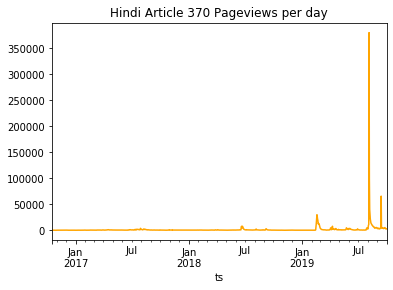

In [30]:
df = df.set_index('ts')

df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')

plt.title('Hindi Article 370 Pageviews per day')

Text(0.5, 1.0, 'Hindi Article 370 Pageviews per day log scale')

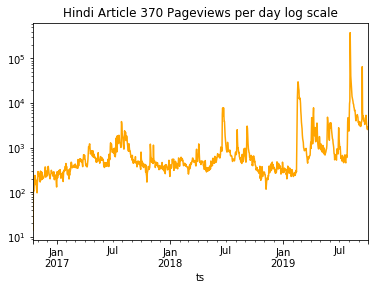

In [32]:
df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')
plt.title('Hindi Article 370 Pageviews per day log scale')

In [39]:
df2 = pd.read_csv("wiki_english_pageviews_2000_thru_Sep2019.csv")
df2 = df2[df2['article'] == 'Article_370_of_the_Constitution_of_India']

df2['ts'] = pd.to_datetime(df2['date'])
df2 = df2.drop('date', axis=1)

df2.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
1554,1555,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,4,2015-07-01
1555,1556,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,1,2015-07-02
1556,1557,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,2,2015-07-03
1557,1558,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,4,2015-07-04
1558,1559,wikipedia,en,Article_370_of_the_Constitution_of_India,all-access,all-agents,daily,1,2015-07-05


Text(0.5, 1.0, 'English Article 370 Pageviews per day')

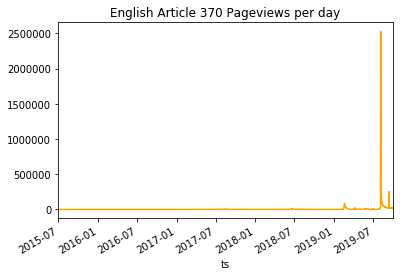

In [40]:
df2 = df2.set_index('ts')

df2['views'].plot(linestyle='-', linewidth=1.5, color = 'orange') 

plt.title('English Article 370 Pageviews per day')

Text(0.5, 1.0, 'English Article 370 Pageviews per day log scale')

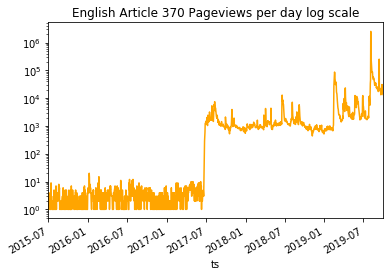

In [41]:
df2['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')

plt.title('English Article 370 Pageviews per day log scale')

In [45]:
df = pd.read_csv("wiki_urdu_pageviews_2000_thru_Sep2019.csv")
df = df[df['article'] == "Article 370 of the Constitution of India"]

df['ts'] = pd.to_datetime(df['date'])
df = df.drop('date', axis=1)

df.head()

,Unnamed: 0,project,language,article,access,agent,granularity,views,ts
58,59,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,2,2015-07-01
59,60,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,11,2015-07-02
60,61,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,11,2015-07-03
61,62,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,6,2015-07-04
62,63,wikipedia,ur,Article 370 of the Constitution of India,all-access,all-agents,daily,2,2015-07-05


Text(0.5, 1.0, 'Urdu Article 370 Pageviews per day')

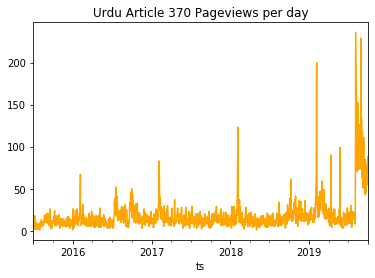

In [46]:
df = df.set_index('ts')

df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')

plt.title('Urdu Article 370 Pageviews per day')

Text(0.5, 1.0, 'Urdu Article 370 Pageviews per day log scale')

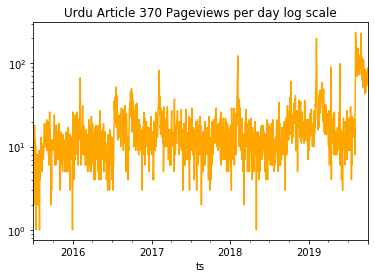

In [47]:
df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
plt.yscale('log')
plt.title('Urdu Article 370 Pageviews per day log scale')

In [70]:
# all at once, save
# IDK why there are errors here - the files get made, it seems to work fine

for file in [ "wiki_hindi_pageviews_2000_thru_Sep2019.csv", "wiki_urdu_pageviews_2000_thru_Sep2019.csv", "wiki_english_pageviews_2000_thru_Sep2019.csv"]:

    df0 = pd.read_csv(file)
    
    if "hindi" in file:
        lang = "hindi"
    elif "english" in file:
        lang = "english"
    else:
        lang = "urdu"

    for article in ["Article 370 of the Constitution of India", "Kashmir conflict", "Insurgency in Jammu and Kashmir"]:
        try:
            df = df0[(df0['article'] == article) | (df0['article'] == article.replace(' ', '_'))]

            df['ts'] = pd.to_datetime(df['date'])
            df = df.drop('date', axis=1)

            df = df.set_index('ts')

            df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
            plt.title(lang + ' ' + article + ' Pageviews per day')
                
            plt.savefig(lang + " " + article + "_pageviews_linear.png")

            plt.clf()

            df['views'].plot(linestyle='-', linewidth=1.5, color = 'orange')
            plt.yscale('log')
            plt.title(lang + ' ' + article + ' Pageviews per day log scale')
            plt.savefig(lang + " " + article + "_pageviews_log.png")

            plt.clf()

        except:
            print('exception')
            # do nothing - this will happen with Urdu on Insurgency article because there is no such article


/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

exception


/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/molly/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

<Figure size 432x288 with 0 Axes>